<br />       

|<img src='./images/school_logo.png' alt="Drawing" style="width:100px;float: left"/><img width=300;/>|<p style="padding-top:8px;padding-bottom:0px;">Shouke Wei, Ph.D.</p><img width=300;/>|139| 
| :--- | :--- | :---:|

<h1 style='text-align: center;'>Lesson 26: Converting Jupyter Notebook into Standalone Web Application</h1>

<br /> 

## Objective
- learn how to Convert a Jupyter Notebook into a Standalone Web Application

Jupyter notbook is not ideal to address non-technical audiences due to many codes, where we have to run our codes to show the results. Many codes might also distract audiences' attention and confuse them. In addition, we don‘t want clients to know the commercial confidential information of the codes in some cases. 

To solve these challenges,**Voilà** was released, which is able to convert Jupyter notebook to a standalone web applications and dashboards. We will talk about the following topics:
- What is Voilà
- Installation of Voilà
- Create a Plot  Web App
- Test the Web App with Voilà

## 26.1. What is Voilà

Voilà is an open-source Python library, which allows you to turn the jupyter notebook into a standalone web application and dashboards. It converts the jupyter notebook into HTML first and then returns it to the user as a web application or dashboards, where only the outputs are displayed with all the inputs being excluded.

Voilà supports for custom interactive widgets, and it can render custom Jupyter widget libraries, including (but not limited to) bqplot, ipyleafet, ipyvolume, ipympl, ipysheet, plotly, ipywebrtc, etc.

For more information about Voilà,please refers to the [Document of Voilà](https://voila.readthedocs.io/en/stable/).

## 26.2. Installation Voilà

Voilà can be installed from either pypi or conda:

**from pypi:**   

In [ ]:
!pip install voila

**or from conda-forge:**   

In [ ]:
!conda install voila -c conda-forge

After installation, you can find there is an icon of Voilà added on the toolbar of Jupyter notebook.

## 26.3 Create Plot  Web App
### 26.3.1 Creat a 3D interative plot web app

### (1) load required libraries

In [10]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### (2) 3D surface plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
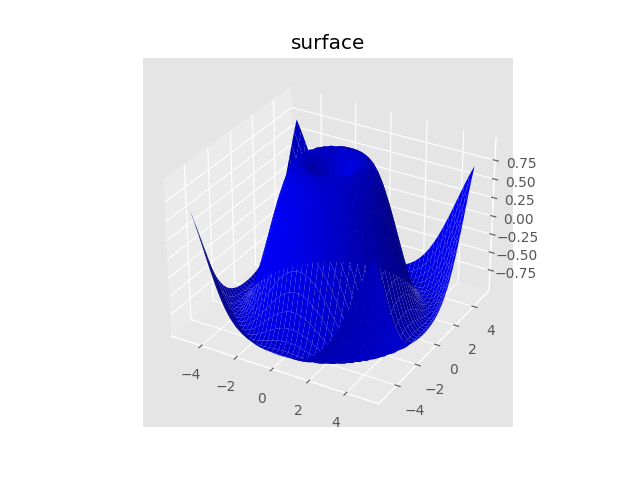

In [11]:
# Define Sine wave function

def sinwave(x, y):
    sinL = np.sin(np.sqrt(x**2+y**2))
    return sinL

x = np.linspace(-5, 5, 40)
y = np.linspace(-5, 5, 40)

X, Y = np.meshgrid(x, y) # create a rectangular grid,
                         # representing the Cartesian indexing or 
                         # Matrix indexing
Z = sinwave(X, Y)

# Plot a basic surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, color='blue')
ax.set_title('surface');

### (3) Test Web App with Voilà

Let's create a new notebook named `simple3DSurfPlot` for example. Copy the codes inside it, and it looks like following.

In [ ]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Define Sine wave function
def sinwave(x, y):
    sinL = np.sin(np.sqrt(x**2+y**2))
    return sinL

x = np.linspace(-5, 5, 40)
y = np.linspace(-5, 5, 40)

X, Y = np.meshgrid(x, y)
Z = sinwave(X, Y)

# Plot a basic wireframe.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, color='blue')
ax.set_title('surface');

There are different ways to convert the Jupyter notebook into standalone app. You can click `Voilà` icon on the toolbar of the **simple3DSurfPlot** notebook that we just created above.

In the second method, just close the Jupyter notebook, and type the command below into a terminal to run the app locally:

```
voila simple3DSurfPlot.ipynb
```
we will get the same result as the first method.

### 26.3.2 Sine wave plot web app

### (1) Import required libraries, packages and methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, HBox,Layout,Button,GridspecLayout

### (2) Choose aesthetic styles for plot
We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures. 
Here we will set the `ggplot` style, which ensures that the plots we create use the `ggplot` Matplotlib style.

In [2]:
plt.style.use('ggplot')

### (3) Define the sinwave plot function

In [3]:
def sinwave(A, f, phi,color):
    # set up plot
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_ylim([-4, 4])
    ax.grid(True)
    ax.set_xlabel('X')
    ax.set_ylabel('Sine Wave')
    ax.set_title('Sine Wave Widget for Interactive Plot')
    
    # fig.canvas.toolbar_position = 'bottom' # set zoom-able and resize-able under the figure
    fig.canvas.header_visible = False # Hide the Figure name at the top of the figure
    
    # generate x values
    x = np.linspace(0, 2 * np.pi, 100)
    y = A*np.sin(x*f + phi);

    ax.plot(x,y,color)

### (4) Create a color list 

In [4]:
colors = ['blue', 'red', 'orange']

### (5) Create a widget for interative plot

In [5]:
widget = interactive(sinwave,A=(0, 4, .1),f=(0, 10, 1), phi=(0, 2, 0.5),color=colors)

The children of the interactive is a list, which inlcudes a dropdown color list,two floatsliders, one intslider and a plot output widget.

In [6]:
widget.children

(FloatSlider(value=2.0, description='A', max=4.0),
 IntSlider(value=5, description='f', max=10),
 FloatSlider(value=1.0, description='phi', max=2.0, step=0.5),
 Dropdown(description='color', options=('blue', 'red', 'orange'), value='blue'),
 Output())

### (6) Create the control widget and plot widget

In [7]:
controls = HBox(widget.children[:-1], layout = Layout(flex_flow='column wrap'),width='auto', height='auto')
output = widget.children[-1]

### (7) Define expanded button function

In [8]:
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

### (8) Using widget template 
Ipywidgets have three main different layout templates used to arrange multiple widgets together. You can easily create a layout with 4 widgets arranged on 2x2 matrix using the `TwoByTwoLayout` widget.  `AppLayout` widget layout template allows you to create an application-like widget arrangements, which consists of a header, a footer, two sidebars and a central pane. `GridspecLayout` is a N-by-M grid layout, which allows to create flexible layout definitions using an API similar to matplotlib’s GridSpec. More details about these widget templates can be refered to [layout templates] (https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html) of ipywidgets.   

In the following example, we use `GridspecLayout` to define a simple regularly-spaced grid, say a 10x5 layout.

In [9]:
# use GridspecLayout to define the widget layout
grid = GridspecLayout(10, 6, height='500px')
grid[0,:] = create_expanded_button('Sine Web Plot App', 'success')
grid[2:8, 0:2] = controls
grid[1:9, 2:] = output
grid[9,:] = create_expanded_button('\xa9 2021 Copyright Shouke Wei', 'info')

grid

GridspecLayout(children=(Button(button_style='success', description='Sine Web Plot App', layout=Layout(grid_ar…

The Button widget has a button_style attribute that may take 5 different values:
```markdown
'primary'
'success'
'info'
'warning'
'danger'
```

### (8) Test Web App with Voilà

Let's create a seperate new notebook named as `sinplotApp` for example, and then copy the above codes in the new notebook. The final codes looks as follows:

In [ ]:
# Import required libraries, packages and methods
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, HBox,Layout,Button,GridspecLayout
from IPython.display import display

# set the ggplot style
plt.style.use('ggplot')

# make the plot zoom-able and resize-able

# define the sinwave plot function
def sinwave(A, f, phi,color):
    # set up plot
    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_ylim([-4, 4])
    ax.grid(True)
    ax.set_xlabel('X')
    ax.set_ylabel('Sine Wave')
    ax.set_title('Sine Wave Widget for Interactive Plot')
    
    # generate x values
    x = np.linspace(0, 2 * np.pi, 100)
    y = A*np.sin(x*f + phi);

    ax.plot(x,y,color)
    

# create color list
colors = ['blue', 'red', 'orange']

# Create a widget for interative plot
# Create a widget for interative plot
widget = interactive(sinwave,A=(0, 4, 0.1),f=(0, 10, 1), phi=(0, 2, 0.5),color=colors)

controls = HBox(widget.children[:-1], layout = Layout(flex_flow='column wrap'),width='auto', height='auto')
output = widget.children[-1]
from IPython.core.display import display

# Define expanded button function

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

# use GridspecLayout to define the widget layout
grid = GridspecLayout(10, 6, height='500px')
grid[0,:] = create_expanded_button('Sine Web Plot App', 'success')
grid[2:8, 0:2] = controls
grid[1:9, 2:] = output
grid[9,:] = create_expanded_button('\xa9 2021 Copyright Shouke Wei', 'info')

grid

So you can click `Voilà` icon on the toolbar of the **sinplotApp** notebook that we just created above.   
Run the app  in a terminal locally:

```
voila sinplotApp.ipynb
```